In [63]:
from plotter import *

Per-antenna phase shape: (6144, 117)
Phase matrix shape: (6144, 117, 117)


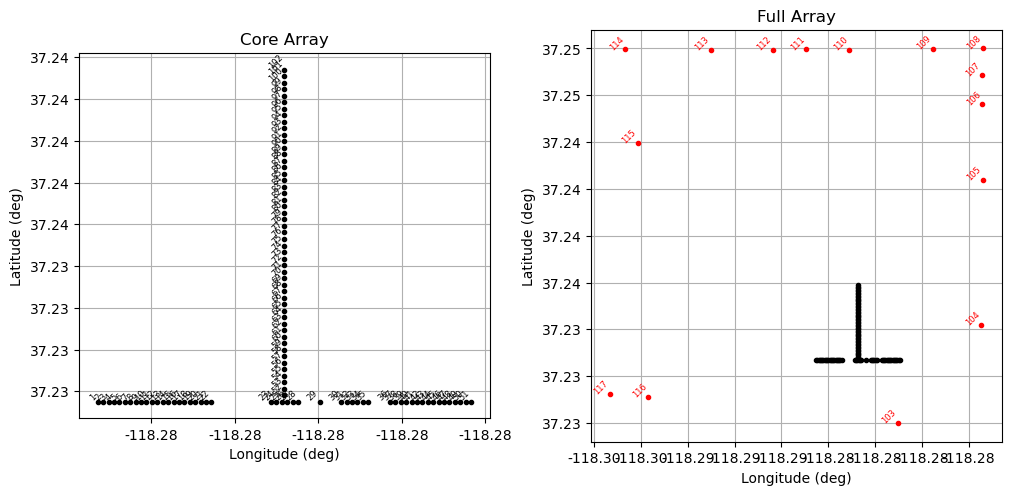

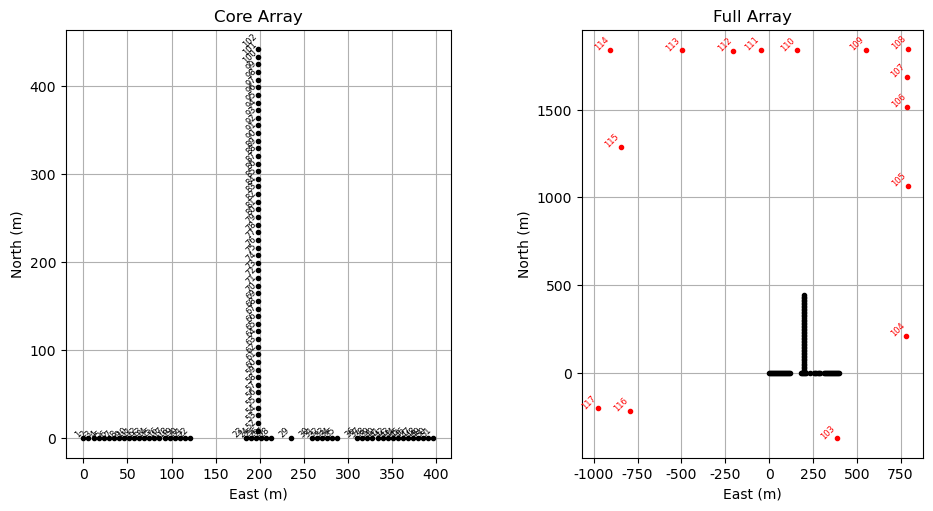

In [64]:
array = DSA110Array('antpos.yaml')
array.flagger(np.arange(103, 118,1))
ra_deg = Angle('20h31m06.38s').deg
dec_deg = Angle('+53d50m56.4s').deg
frequencies_hz = np.linspace(1498.75e6 - 187.5e6, 1498.75, 6144)  
obstime = Time.now()              

phases = array.per_antenna_phase(ra_deg, dec_deg, obstime, frequencies_hz)
print("Per-antenna phase shape:", phases.shape)

phase_mat = array.phase_matrix(ra_deg, dec_deg, obstime, frequencies_hz)
print("Phase matrix shape:", phase_mat.shape)
array.plot_positions()
array.plot_positions(frame="enu")

In [4]:
from plotter import *

Loading 96 antenna files...
Successfully loaded 96 antennas: 0 to 95
Added antennas [58, 89, 93, 94] to flagged list
Current flagged antennas: [58, 89, 93, 94]


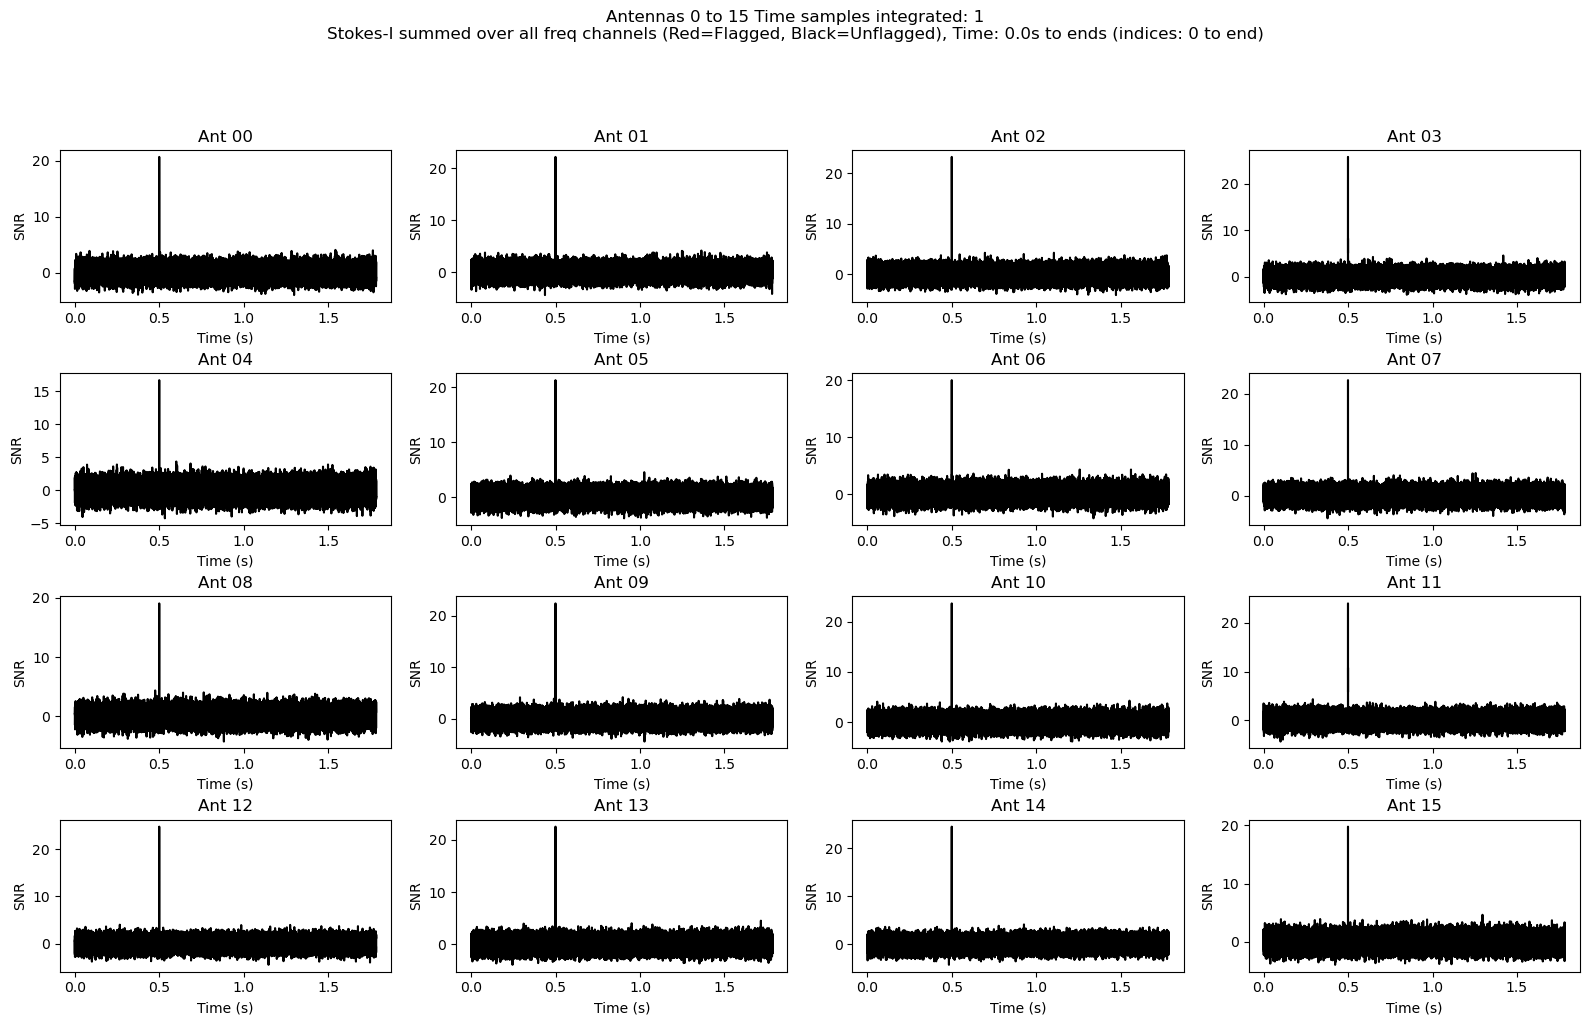

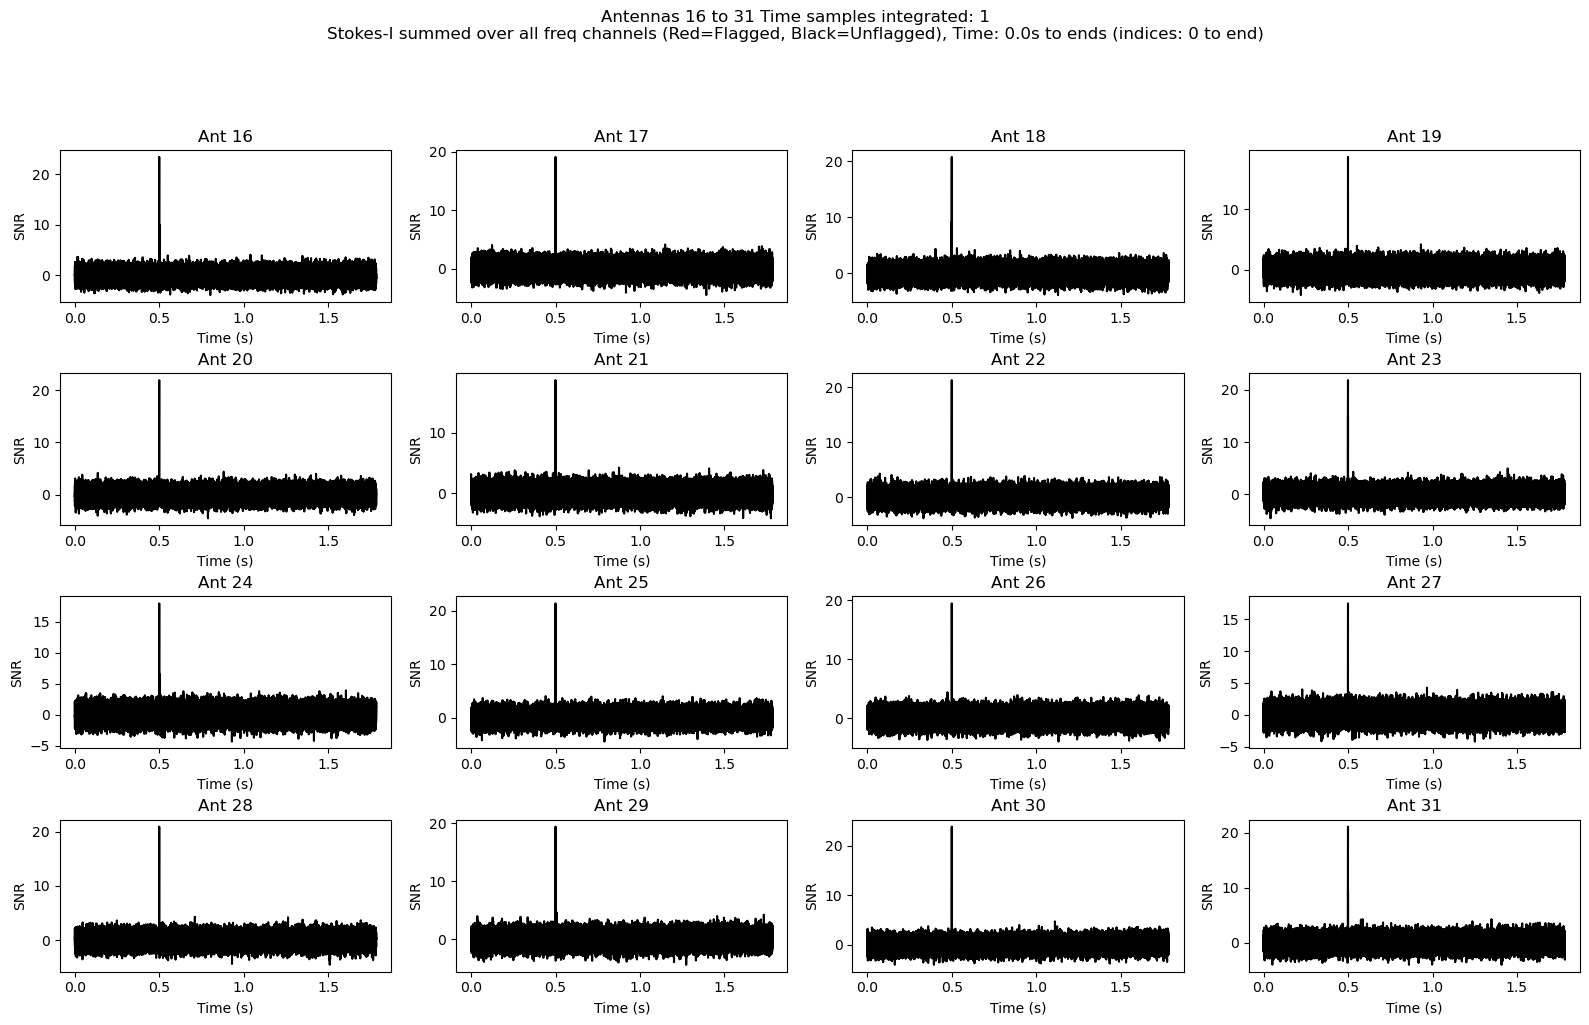

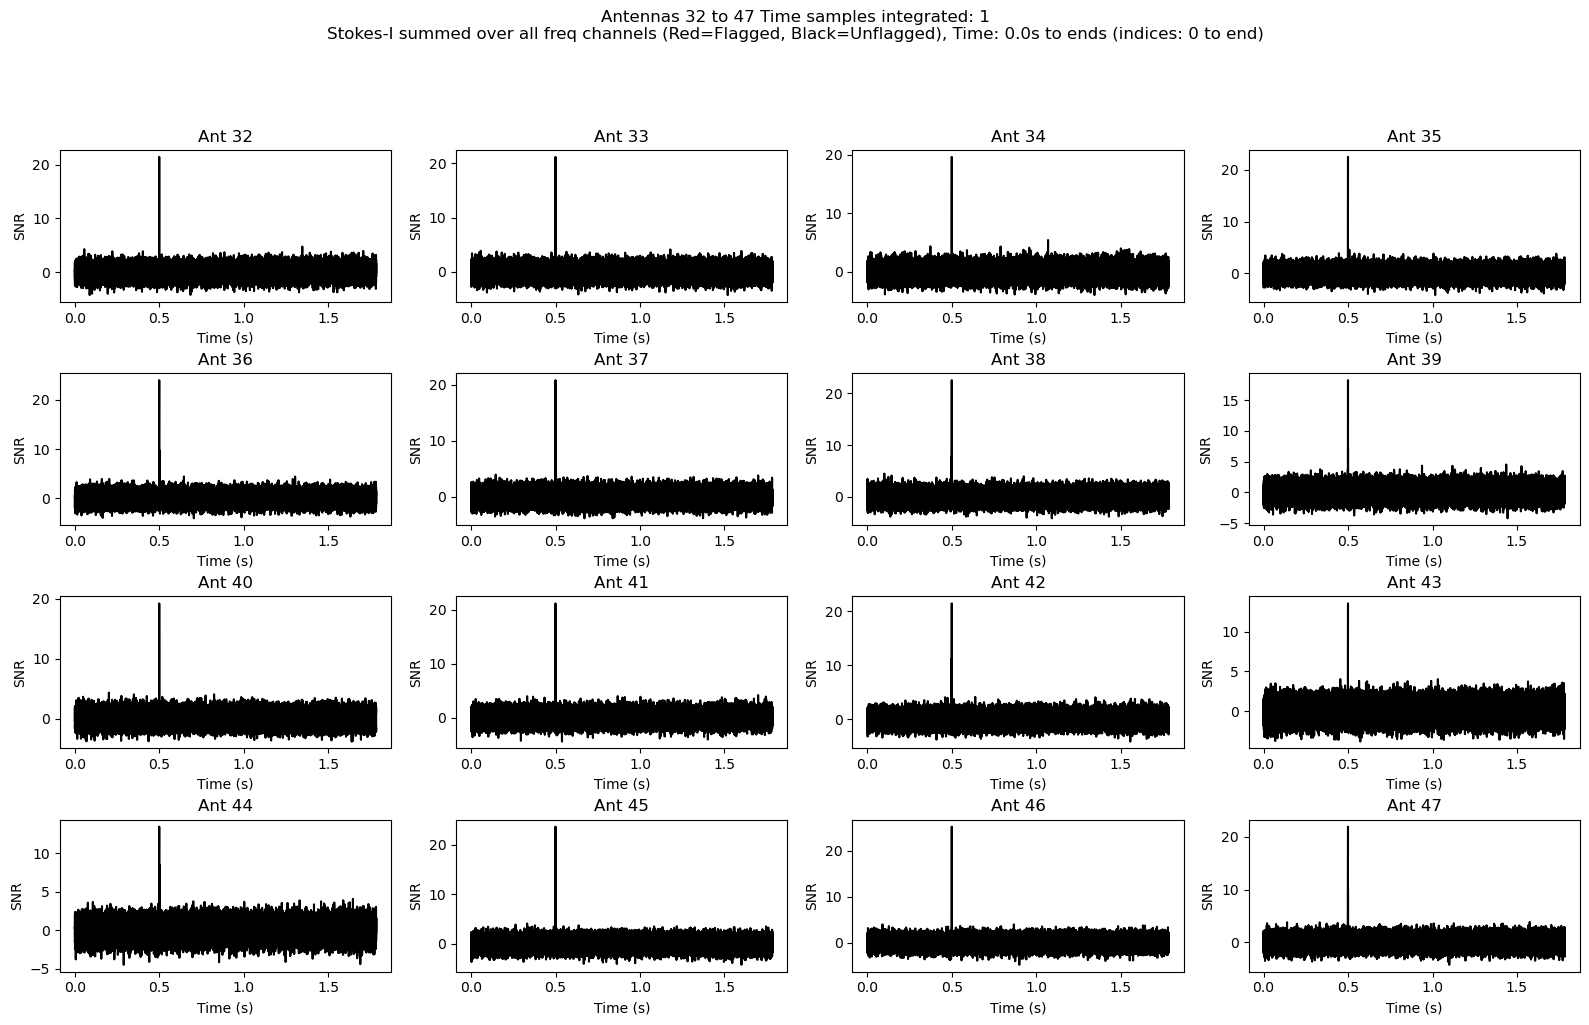

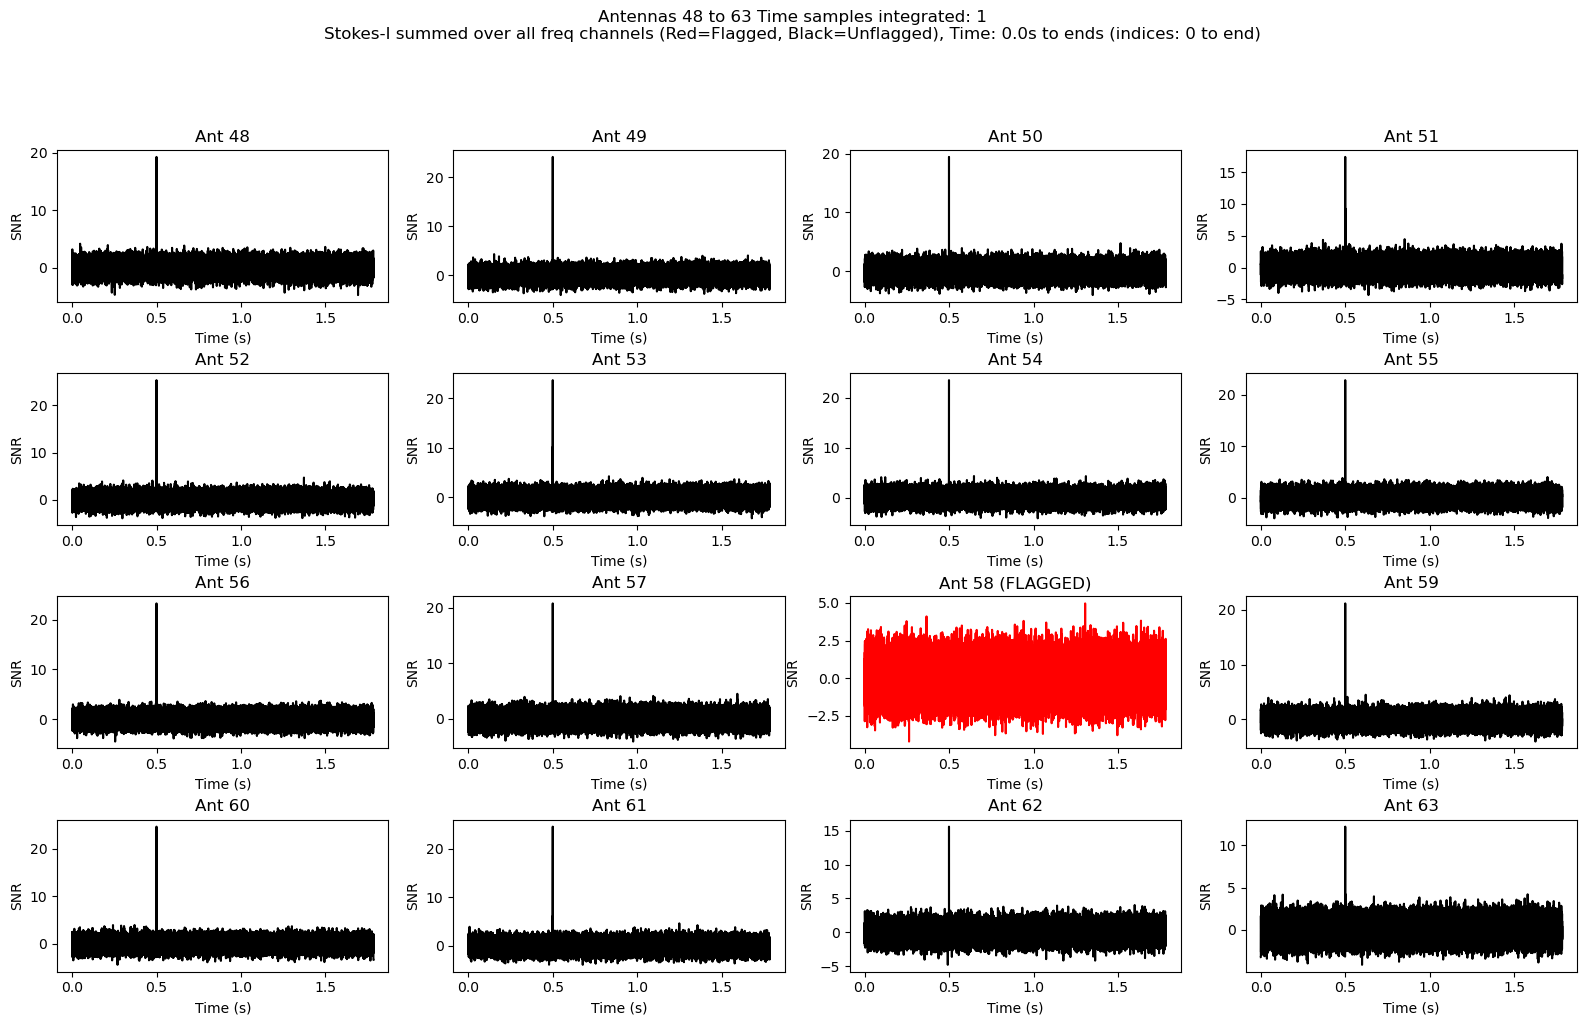

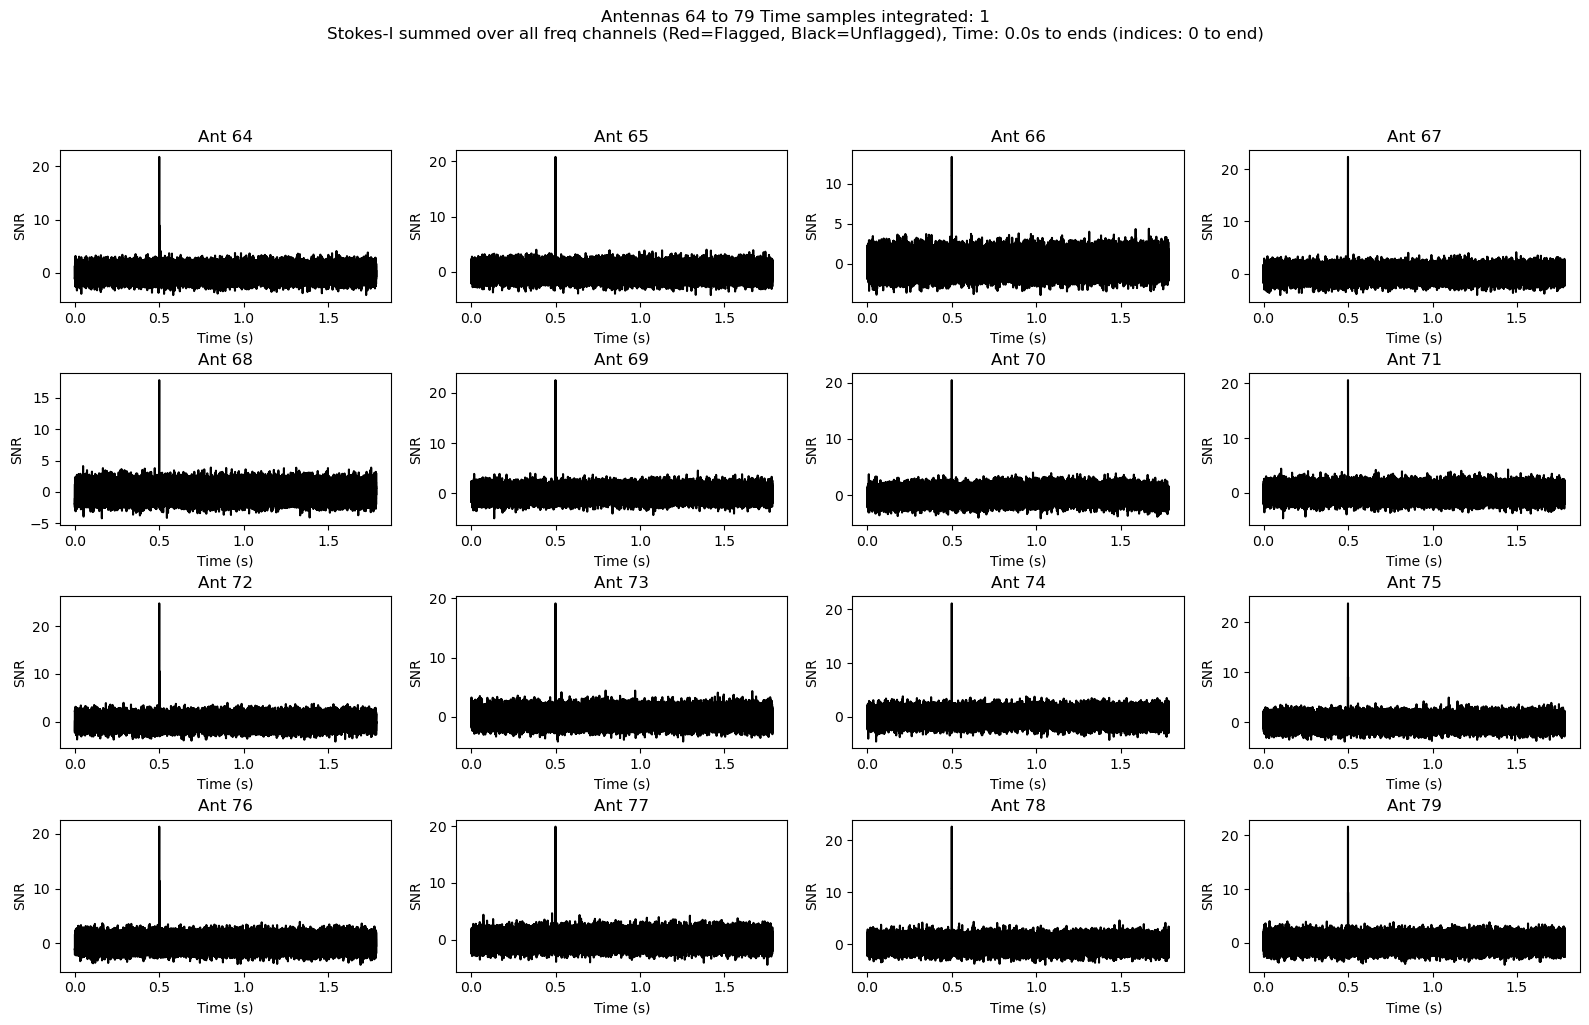

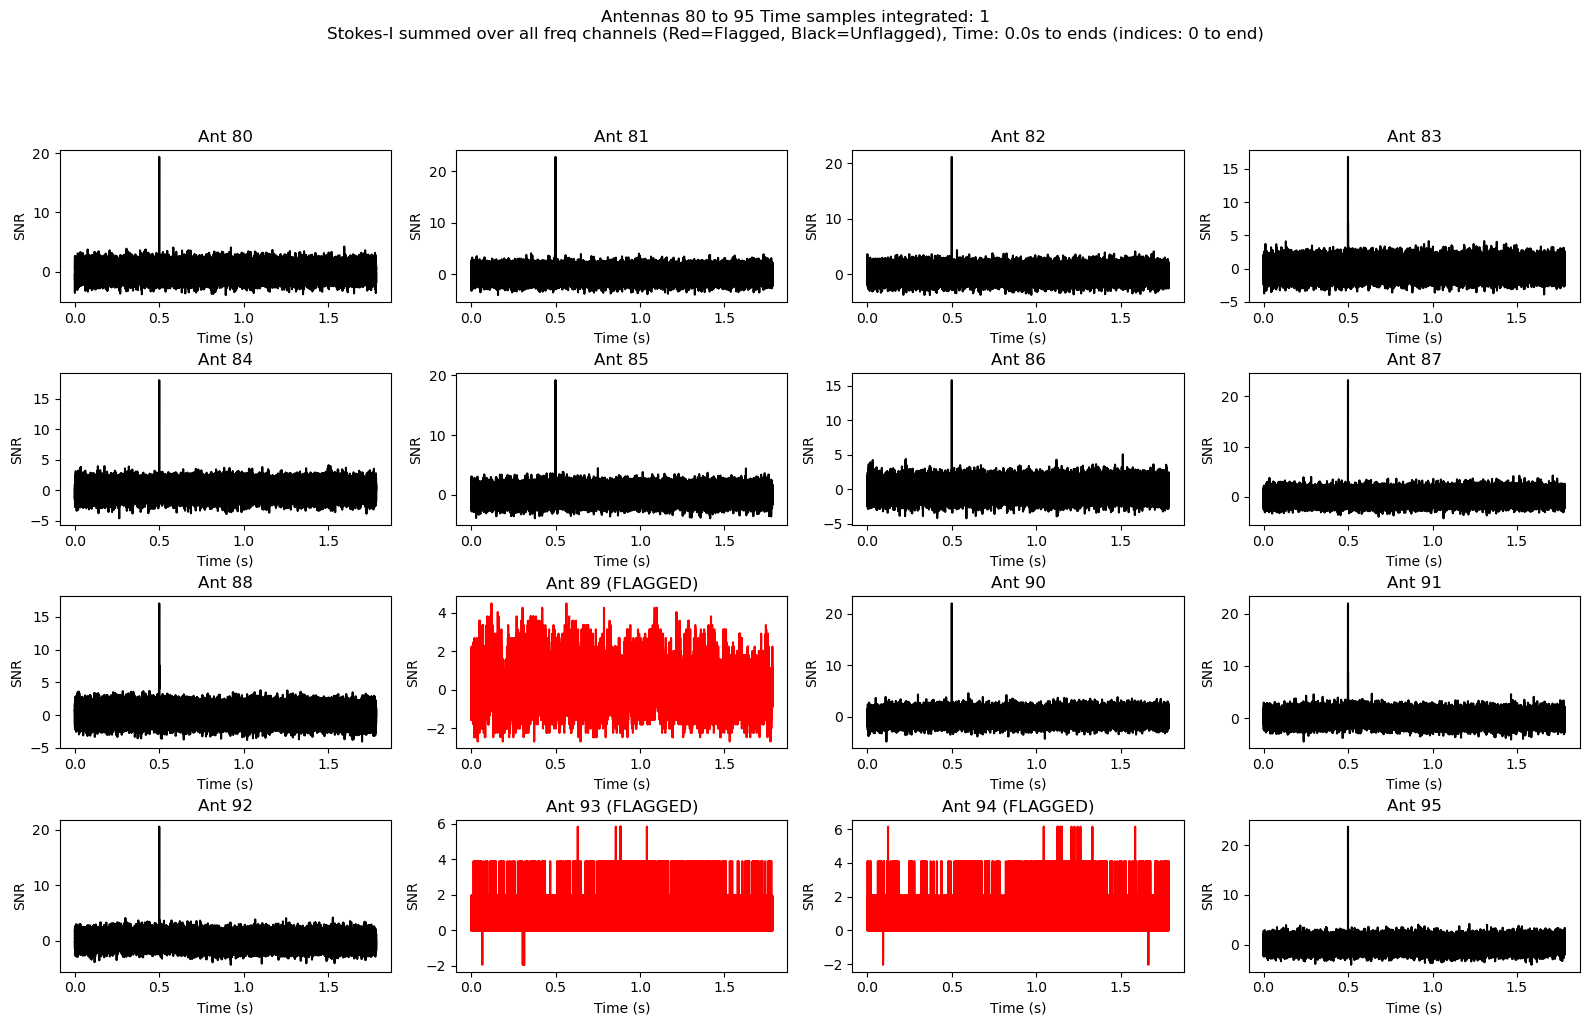

In [5]:
FILES_DIR = "/Users/pranav/dsa110_data/250924mptq_out"
analyzer = TimeSeries(f"{FILES_DIR}/time_series")
analyzer.load_all_data()
flagged_antenna = [58, 89, 93, 94]
analyzer.add_flagged_antennas(flagged_antenna)
analyzer.plot_all_ants(start_time=0) # Plots all antennas, shows current flags in red

Available antennas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]
Flagged antennas: [58, 89, 93, 94]
Excluding flagged antenna 58
Excluding flagged antenna 89
Excluding flagged antenna 93
Excluding flagged antenna 94
Summing 92 unflagged antennas
Time sampling: 3.2768e-05 s
Header start_time: 0.0 s, start_sample: 0
Time range: 0.000000 to 1.783890 s (54441 samples)
[(15246, 15255)]


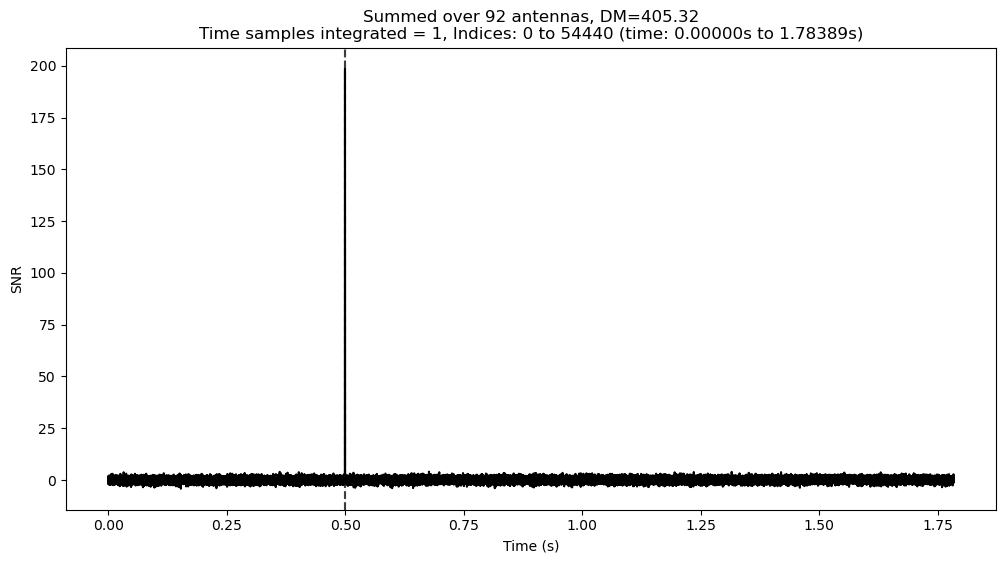

Time sampling: 3.2768e-05 s
Header start_time: 0.0 s, start_sample: 0
Time range: 0.000000 to 1.783890 s (54441 samples)
[(19, 28)]


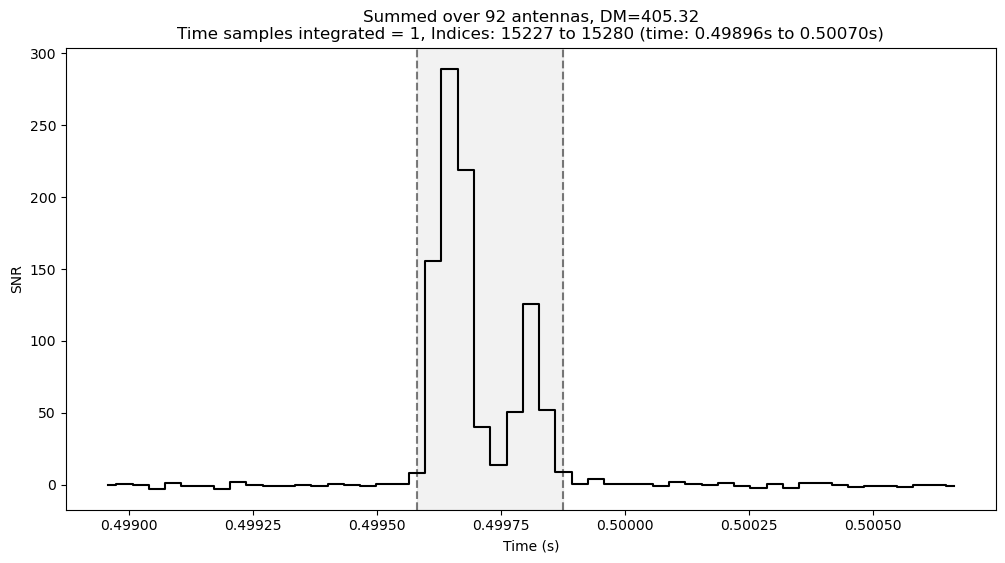

Time sampling: 3.2768e-05 s
Header start_time: 0.0 s, start_sample: 0
Time range: 0.000000 to 1.783890 s (54441 samples)
[(19, 28)]


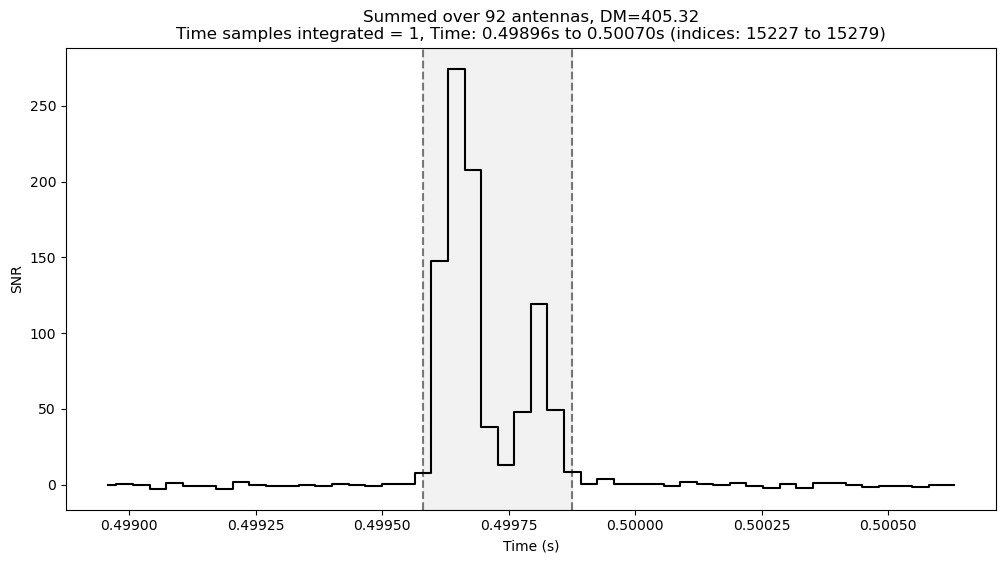

In [6]:
analyzer.compute_sum()

snr, times = analyzer.plot_snr_vs_time(int_time_samples=1)
snr, times = analyzer.plot_snr_vs_time(int_time_samples=1, start_idx=15227, stop_idx=15280)
snr, times = analyzer.plot_snr_vs_time(int_time_samples=1, start_time=0.49895834, stop_time=0.500695040)

Added antennas [58, 89, 93, 94] to flagged list
Current flagged antennas: [58, 89, 93, 94]
Scanning 96 antennas for metadata...
Successfully scanned 96 antennas: 0 to 95


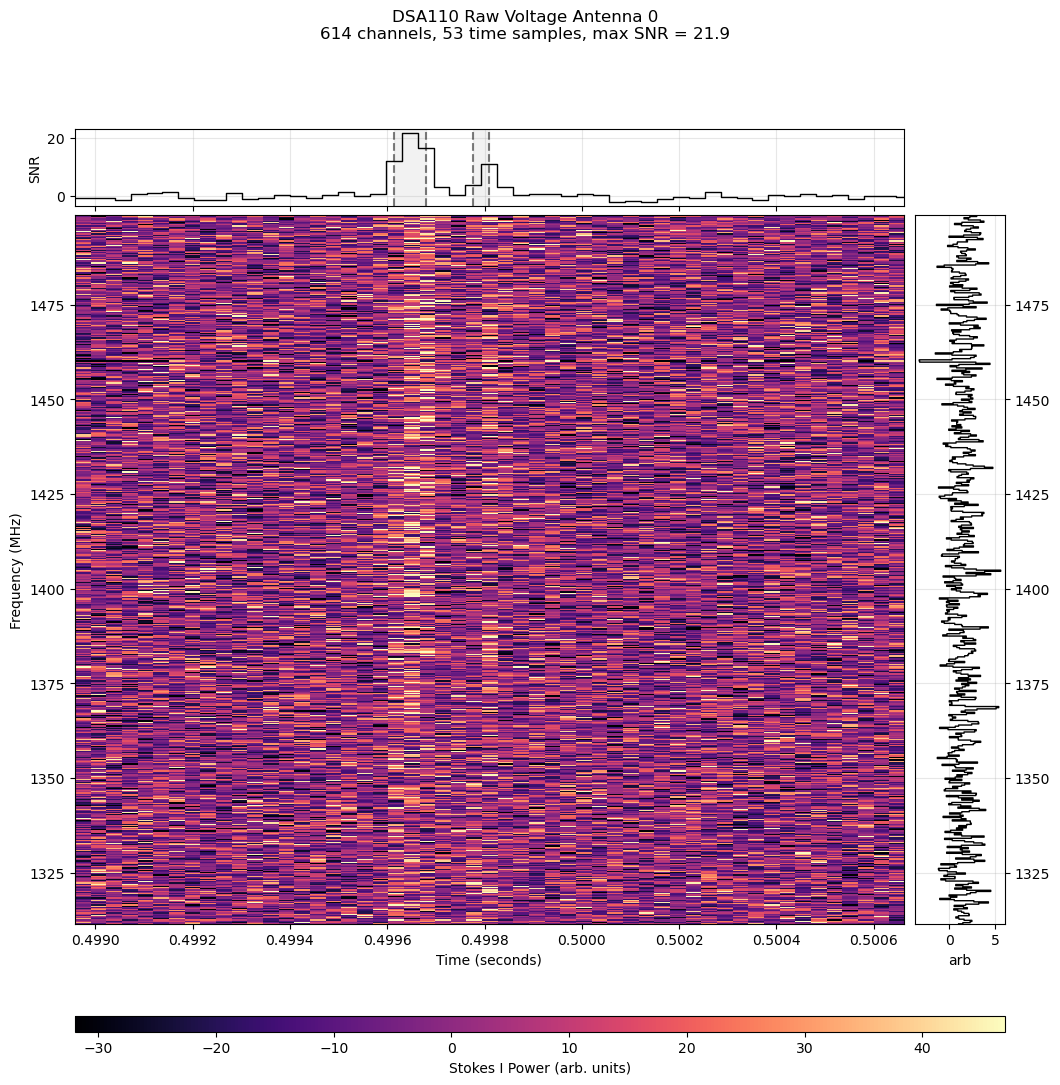

Computing incoherent sum of 92 unflagged antennas


Processing antennas: 100%|█████████████████████████████████████████| 92/92 [00:00<00:00, 140.93it/s]


Successfully summed 92 antennas


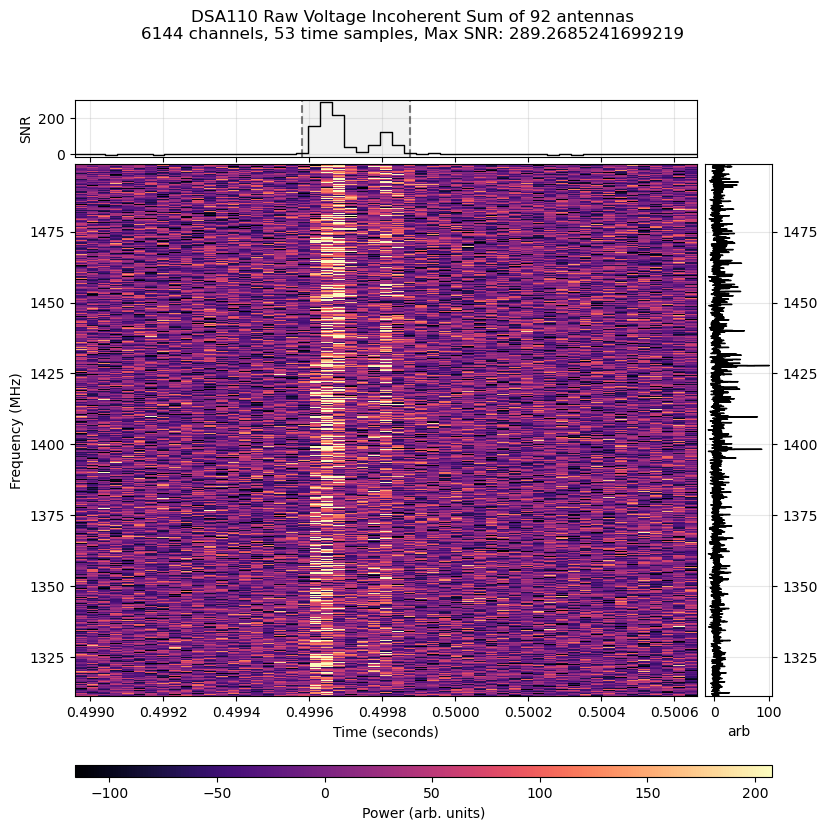

In [7]:
from plotter import *
FILES_DIR = "/Users/pranav/dsa110_data/250924mptq_out"
flagged_antenna = [58, 89, 93, 94]
plotter = RawVoltages(f"{FILES_DIR}/raw_voltages")
plotter.add_flagged_antennas(flagged_antenna)   # Flag bad antennas
_ = plotter.load_all_data()
_ = plotter.plot_waterfall(0, freq_bin=10)
plotter.compute_incoherent_sum()
_ = plotter.plot_incoherent_sum()

In [9]:
#_ = plotter.load_voltage_data(start_time=0.4996, stop_time=0.499646536)
#_ = plotter.load_voltage_data()
_ = plotter.load_voltage_data(start_sample=19, stop_sample=28)


Loading voltage data for 92 antennas...


Loading voltage data: 100%|████████████████████████████████████████| 92/92 [00:00<00:00, 149.18it/s]

Successfully loaded voltage data for 92 antennas
Data shape per antenna: (9, 6144)
Total memory usage: 0.08 GB
Time range: 0.499581 to 0.499843 seconds


In [10]:
n2x = plotter.compute_n2_matrix(polarization='x')
n2x.compute_eigendecomposition()
vx = n2x.get_dominant_mode()
wx = vx['eigenvector'][:]

Computing N2 matrix for 6144 frequency channels...


Computing N2 matrices: 100%|██████████████████████████████████| 6144/6144 [00:01<00:00, 5518.64it/s]


Computing eigenvalue decomposition...


Eigendecomposition by frequency: 100%|██████████████████████████| 6144/6144 [01:23<00:00, 73.85it/s]

Eigenvalue decomposition completed!


In [11]:
n2y = plotter.compute_n2_matrix(polarization='y')
n2y.compute_eigendecomposition()
vy = n2y.get_dominant_mode()
wy = vy['eigenvector'][:]

Computing N2 matrix for 6144 frequency channels...


Computing N2 matrices: 100%|██████████████████████████████████| 6144/6144 [00:01<00:00, 4816.16it/s]


Computing eigenvalue decomposition...


Eigendecomposition by frequency: 100%|█████████████████████████| 6144/6144 [00:43<00:00, 141.93it/s]

Eigenvalue decomposition completed!


In [19]:
_ = plotter.load_voltage_data()
Vx = np.array([plotter.voltage_data[ant]['pol_x'] for ant in plotter.voltage_data.keys()]).transpose(2,0,1)
Vy = np.array([plotter.voltage_data[ant]['pol_y'] for ant in plotter.voltage_data.keys()]).transpose(2,0,1)

Loading voltage data for 92 antennas...


Loading voltage data: 100%|████████████████████████████████████████| 92/92 [00:00<00:00, 166.15it/s]


Successfully loaded voltage data for 92 antennas
Data shape per antenna: (53, 6144)
Total memory usage: 0.45 GB
Time range: 0.498958 to 0.500662 seconds


In [20]:
bfx = np.sum(np.conj(wx)[:, :, None] * Vx, axis=1)   # shape (m, t)
bfy = np.sum(np.conj(wy)[:, :, None] * Vy, axis=1)   # shape (m, t)

In [21]:
V = {}
V['pol_x'] = bfx.T
V['pol_y'] = bfy.T

In [22]:
times=  plotter.all_meta[0]['times']

In [23]:
freqs = plotter.all_meta[0]['frequencies']

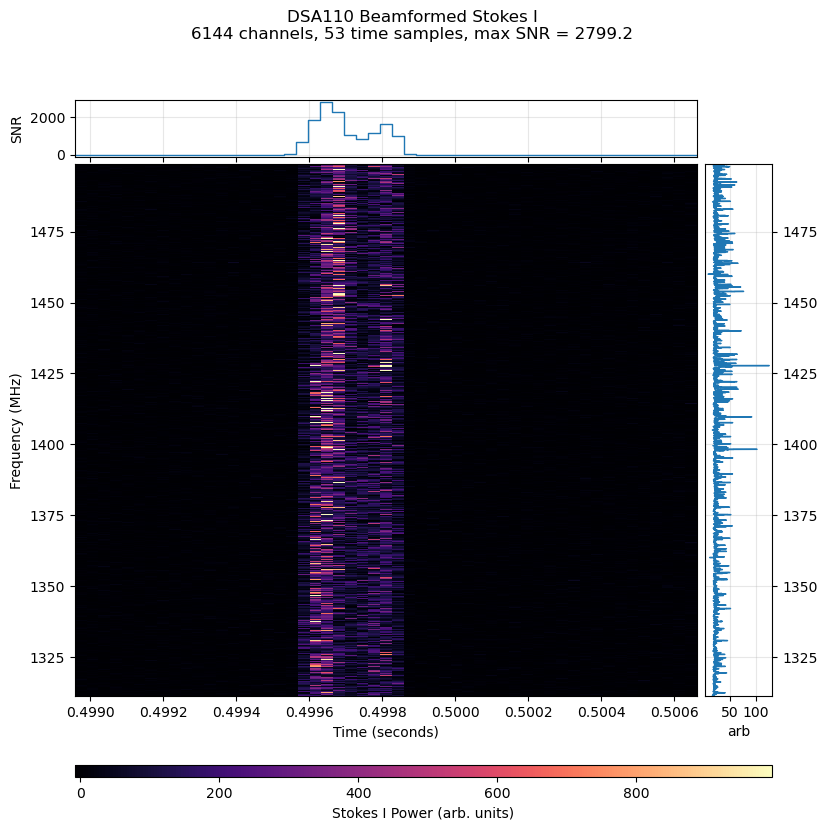

In [53]:
ts, wfall = plot_waterfall(V, times, freqs, plotter, (9,9))

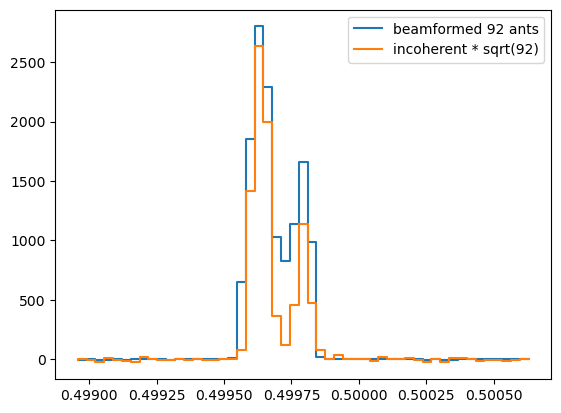

In [62]:
plt.step(times[:52],ts[:52], label="beamformed 92 ants")
plt.step(times[:52],snr*np.sqrt(92), label = "incoherent * sqrt(92)" )
plt.legend()